## Capstone - 2 live streamming Platform

#### A streaming platform company allows different streamers to use its platform to conduct/deliver a live stream session. Now, the company wants to know which are its top streamers.

### Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Dataset

In [2]:
r = pd.read_csv('all_stream_info.csv')

In [3]:
r.shape

(3148, 24)

In [4]:
r.head()

,liveStreamID,beginTime,endTime,duration,closeBy,maxLiveViewerCount,maxLiveViewerTime,privateLiveStream,receivedLikeCount,streamerType,...,isContracted,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,avgViewerDuration,count,receivePointEstimated
0,109437538,2020-06-22 11:55:21 UTC,2020-06-22 16:37:19 UTC,16918,normalEnd,363,2020-06-22 16:28:17.87 UTC,0,11092,0,...,NaN,779,46,30,68,17,13,424.32,1108,13105
1,109441785,2020-06-22 14:55:26 UTC,2020-06-22 21:31:19 UTC,23753,normalEnd,100,2020-06-22 19:07:52.872 UTC,0,772,0,...,NaN,821,54,38,68,20,8,186.28,2318,90701
2,109438205,2020-06-22 12:20:34 UTC,2020-06-22 16:02:46 UTC,13332,disconnect,471,2020-06-22 14:53:26.692 UTC,0,19403,0,...,NaN,1605,529,223,696,60,17,81.14,1199,222376
3,109438917,2020-06-22 12:54:21 UTC,2020-06-22 14:47:27 UTC,6786,normalEnd,44,2020-06-22 14:29:13.806 UTC,0,191,0,...,NaN,96,23,24,41,12,8,389.91,432,4313
4,109442185,2020-06-22 15:18:20 UTC,2020-06-22 15:48:02 UTC,1782,normalEnd,52,2020-06-22 15:42:33.849 UTC,0,77,0,...,NaN,109,20,18,38,17,5,222.76,162,1547


### EDA

In [5]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148 entries, 0 to 3147
Data columns (total 24 columns):
liveStreamID             3148 non-null int64
beginTime                3148 non-null object
endTime                  3148 non-null object
duration                 3148 non-null int64
closeBy                  3051 non-null object
maxLiveViewerCount       3148 non-null int64
maxLiveViewerTime        1838 non-null object
privateLiveStream        3148 non-null int64
receivedLikeCount        3148 non-null int64
streamerType             3148 non-null int64
isShow                   3148 non-null bool
cultureGroup             0 non-null float64
userID                   3148 non-null object
registerCountry          3148 non-null object
isContracted             0 non-null float64
uniqueViewerCount        3148 non-null int64
ios                      3148 non-null int64
android                  3148 non-null int64
durationGTE5sec          3148 non-null int64
durationGTE2min          3148 non-n

In [6]:
r.dtypes

liveStreamID               int64
beginTime                 object
endTime                   object
duration                   int64
closeBy                   object
maxLiveViewerCount         int64
maxLiveViewerTime         object
privateLiveStream          int64
receivedLikeCount          int64
streamerType               int64
isShow                      bool
cultureGroup             float64
userID                    object
registerCountry           object
isContracted             float64
uniqueViewerCount          int64
ios                        int64
android                    int64
durationGTE5sec            int64
durationGTE2min            int64
durationGTE10min           int64
avgViewerDuration        float64
count                      int64
receivePointEstimated      int64
dtype: object

In [7]:
r.describe()

,liveStreamID,duration,maxLiveViewerCount,privateLiveStream,receivedLikeCount,streamerType,cultureGroup,isContracted,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,avgViewerDuration,count,receivePointEstimated
count,3.148000e+03,3148.000000,3148.000000,3148.0,3148.000000,3148.0,0.0,0.0,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,1689.000000,3148.000000,3.148000e+03
mean,1.093797e+08,3495.864041,15.416773,0.0,358.428526,0.0,NaN,NaN,55.416773,26.285896,20.519377,44.560991,8.994917,3.937103,241.049467,126.772872,8.874376e+03
std,3.381310e+04,6651.916426,45.505183,0.0,2145.579197,0.0,NaN,NaN,160.855894,81.280647,60.532012,131.896474,26.843270,13.057200,244.360800,330.297666,4.778547e+04
min,1.093211e+08,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.093518e+08,136.750000,0.000000,0.0,0.000000,0.0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.060000,0.000000,0.000000e+00
50%,1.093835e+08,1032.500000,2.000000,0.0,0.000000,0.0,NaN,NaN,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,185.300000,1.000000,0.000000e+00
75%,1.094082e+08,4801.500000,8.000000,0.0,62.000000,0.0,NaN,NaN,39.000000,20.000000,11.000000,31.000000,8.000000,3.000000,318.980000,112.250000,1.501500e+03
max,1.094427e+08,121258.000000,493.000000,0.0,65831.000000,0.0,NaN,NaN,2385.000000,1639.000000,730.000000,2142.000000,493.000000,302.000000,2855.000000,5342.000000,1.474727e+06


In [8]:
r.isnull().sum()

liveStreamID                0
beginTime                   0
endTime                     0
duration                    0
closeBy                    97
maxLiveViewerCount          0
maxLiveViewerTime        1310
privateLiveStream           0
receivedLikeCount           0
streamerType                0
isShow                      0
cultureGroup             3148
userID                      0
registerCountry             0
isContracted             3148
uniqueViewerCount           0
ios                         0
android                     0
durationGTE5sec             0
durationGTE2min             0
durationGTE10min            0
avgViewerDuration        1459
count                       0
receivePointEstimated       0
dtype: int64

In [9]:
r['avgViewerDuration'] = r['avgViewerDuration'].fillna(r['avgViewerDuration'].mean())

In [10]:
r = r.drop(['isContracted', 'cultureGroup', 'closeBy', 'maxLiveViewerTime'], axis=1)

In [11]:
 r.isnull().sum()

liveStreamID             0
beginTime                0
endTime                  0
duration                 0
maxLiveViewerCount       0
privateLiveStream        0
receivedLikeCount        0
streamerType             0
isShow                   0
userID                   0
registerCountry          0
uniqueViewerCount        0
ios                      0
android                  0
durationGTE5sec          0
durationGTE2min          0
durationGTE10min         0
avgViewerDuration        0
count                    0
receivePointEstimated    0
dtype: int64

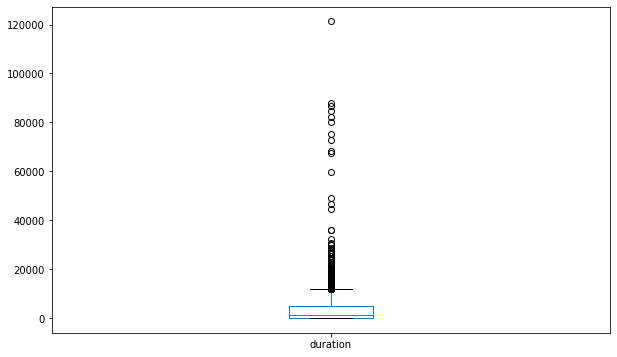

In [41]:
plt.figure(figsize = (10,6))
r['duration'].plot(kind = 'box')
plt.show()

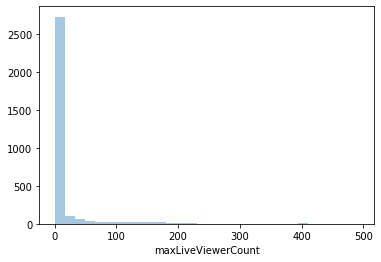

In [45]:
sns.distplot(r['maxLiveViewerCount'], kde = False, bins = 30)
plt.show()

### Creating Target Variable

In [13]:
r.loc[(r.receivePointEstimated>1000), 'streaming'] = 'good'
r.loc[(r.receivePointEstimated<1000), 'streaming'] = 'bad'

In [14]:
r['streaming'] = r.streaming.apply(lambda x:1 if x == 'good' else 0)

In [15]:
r.streaming.value_counts()

0    2284
1     864
Name: streaming, dtype: int64

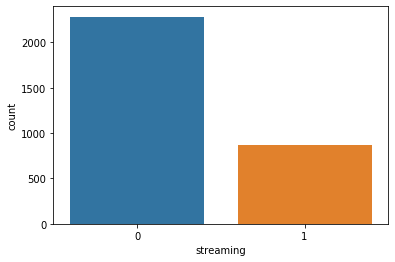

In [16]:
a6 = sns.countplot(x="streaming", data=r)

In [17]:
y = r.streaming

In [18]:
y.isnull().sum()

0

In [19]:
X = r.loc[:, ['receivedLikeCount', 'durationGTE10min', 'streamerType', 'uniqueViewerCount', 'ios', 'android', 'count', 'durationGTE2min', 'avgViewerDuration',]]

# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size = 0.2, random_state=50)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler=MinMaxScaler()

In [24]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [25]:
X_train=scaler.transform(X_train)

In [26]:
X_test=scaler.transform(X_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
model = RandomForestClassifier()

In [29]:
model.fit(X_train,y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
predict = model.predict(X_test)

# Model Building

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [32]:
 accuracy_score(y_test,predict)

0.8984126984126984

In [33]:
confusion_matrix(y_test,predict)

array([[450,  23],
       [ 41, 116]], dtype=int64)

In [34]:
f1_score(y_test,predict)

0.7837837837837837

In [35]:
r = r.sort_values(by = 'receivePointEstimated', ascending = False )

In [36]:
r.head(20)

,liveStreamID,beginTime,endTime,duration,maxLiveViewerCount,privateLiveStream,receivedLikeCount,streamerType,isShow,userID,...,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,avgViewerDuration,count,receivePointEstimated,streaming
1922,109419962,2020-06-21 07:16:53 UTC,2020-06-21 15:48:32 UTC,30699,403,0,13954,0,False,856ecf5c-aefd-4047-a1fd-fb069103ac9f,...,1806,1117,412,1482,146,61,229.81,3217,1474727,1
2815,109409959,2020-06-20 13:20:17 UTC,2020-06-21 13:21:48 UTC,86491,157,0,6337,0,False,7311d32a-e572-4a59-855b-bdd711553bd5,...,1980,1039,695,1675,265,99,202.95,3483,1018678,1
2826,109400648,2020-06-20 01:13:22 UTC,2020-06-20 02:38:05 UTC,5083,182,0,910,0,False,be97a95d-d62d-4b19-aa91-4064bf102f0c,...,239,89,109,194,14,7,89.75,250,836163,1
2790,109400301,2020-06-20 00:24:44 UTC,2020-06-20 03:23:38 UTC,10734,52,0,1189,0,False,033eb47a-557a-4c2d-9ead-61eee57ae184,...,635,422,185,592,154,77,340.76,1668,714158,1
496,109332718,2020-06-15 14:48:54 UTC,2020-06-15 22:16:35 UTC,26861,105,0,8549,0,False,6cd90016-b679-4a7b-8cc6-2c43d4590cca,...,1068,577,440,973,192,88,361.42,2072,584018,1
899,109336781,2020-06-16 00:32:16 UTC,2020-06-16 02:05:27 UTC,5591,148,0,711,0,False,be97a95d-d62d-4b19-aa91-4064bf102f0c,...,265,88,134,214,40,25,360.82,307,379698,1
81,109389398,2020-06-19 09:03:21 UTC,2020-06-19 14:10:28 UTC,18427,355,0,22479,0,False,8258d28e-47b9-4ce8-a765-29175b663a1d,...,2385,1639,570,2142,477,251,426.86,5342,370581,1
1972,109430143,2020-06-21 22:19:23 UTC,2020-06-22 01:08:43 UTC,10160,41,0,452,0,False,033eb47a-557a-4c2d-9ead-61eee57ae184,...,678,178,120,279,73,33,231.83,1470,370472,1
109,109385156,2020-06-19 00:51:11 UTC,2020-06-19 08:21:06 UTC,26995,132,0,4720,0,False,d3888de8-b499-4afc-bf1e-14ccf2f7b9bd,...,910,431,391,775,130,52,180.65,1344,326176,1
577,109321219,2020-06-15 00:12:44 UTC,2020-06-15 04:29:43 UTC,15419,158,0,1513,0,False,033eb47a-557a-4c2d-9ead-61eee57ae184,...,1004,536,402,923,187,75,230.39,1990,319729,1


In [37]:
r.streaming.value_counts(normalize = True)

0    0.72554
1    0.27446
Name: streaming, dtype: float64